# Final Project - Data Mining
#**CO2 Emission estimation using machie learning**


## Introduction

In this notebook, we aim to predict CO2 emissions from vehicles using regression techniques. The dataset used comes from Natural Resources Canada and contains fuel consumption and technical specifications for various car models in 2022. ## Introduction

In this notebook, we aim to predict CO2 emissions from vehicles using regression techniques. The dataset used comes from Natural Resources Canada and contains fuel consumption and technical specifications for various car models in 2022.

Dataset: [2022 Fuel Consumption Ratings (Kaggle)](https://www.kaggle.com/datasets/rinichristy/2022-fuel-consumption-ratings)

We will go through the following steps:
- Load and explore the dataset.
- Clean and preprocess the data.
- Train and evaluate multiple regression models.
- Interpret the model through feature importance analysis.


We will go through the following steps:
- Load and explore the dataset.
- Clean and preprocess the data.
- Train and evaluate multiple regression models.
- Interpret the model through feature importance analysis.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visual style
sns.set(style='whitegrid')

## Load and Preview the Dataset

We begin by importing the dataset and displaying the first few rows. This helps to understand the structure and the types of attributes we are dealing with.


In [4]:

df = pd.read_csv("/content/MY2022 Fuel Consumption Ratings.csv")

# Quick view
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


## Basic Statistics and Missing Values

We check:
- The number of rows and columns,
- Attribute data types,
- Presence of missing values.

This gives a general overview of data quality and potential preprocessing needs.



In [5]:
print("Number of records:", df.shape[0])
print("Number of attributes:", df.shape[1])
print("\nAttribute types:\n", df.dtypes)
print("\nNull values ​​per column:\n", df.isnull().sum())


Number of records: 946
Number of attributes: 15

Attribute types:
 Model Year                             int64
Make                                  object
Model                                 object
Vehicle Class                         object
Engine Size(L)                       float64
Cylinders                              int64
Transmission                          object
Fuel Type                             object
Fuel Consumption (City (L/100 km)    float64
Fuel Consumption(Hwy (L/100 km))     float64
Fuel Consumption(Comb (L/100 km))    float64
Fuel Consumption(Comb (mpg))           int64
CO2 Emissions(g/km)                    int64
CO2 Rating                             int64
Smog Rating                            int64
dtype: object

Null values ​​per column:
 Model Year                           0
Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders            

## Distribution of CO2 Emissions

We plot a histogram with a KDE curve of the target variable `CO2 Emissions(g/km)` to analyze its distribution. This helps us understand skewness or outliers in the data.


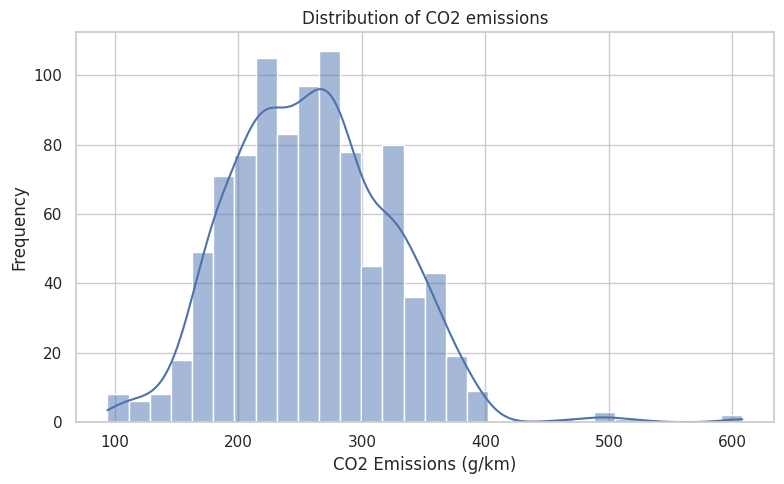

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df["CO2 Emissions(g/km)"], kde=True, bins=30)
plt.title("Distribution of CO2 emissions")
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


## Boxplots of Key Features

We use boxplots to visualize the distribution and spread of key continuous attributes. This highlights outliers and provides insight into the variability of each feature.


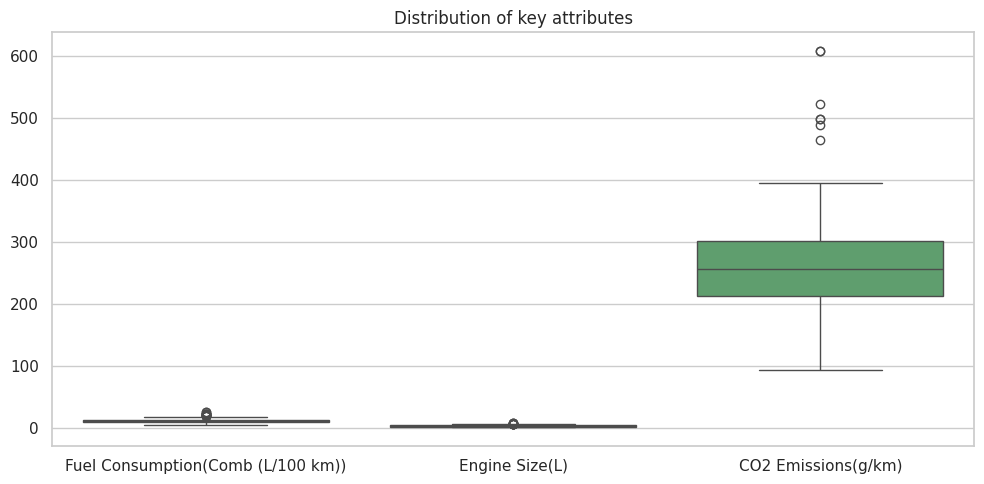

In [7]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[[
    "Fuel Consumption(Comb (L/100 km))",
    "Engine Size(L)",
    "CO2 Emissions(g/km)"
]])
plt.title("Distribution of key attributes")
plt.tight_layout()
plt.show()



## Correlation Matrix

We plot a heatmap of the correlation matrix for all numerical variables to detect multicollinearity and identify which features are most strongly correlated with CO2 emissions.


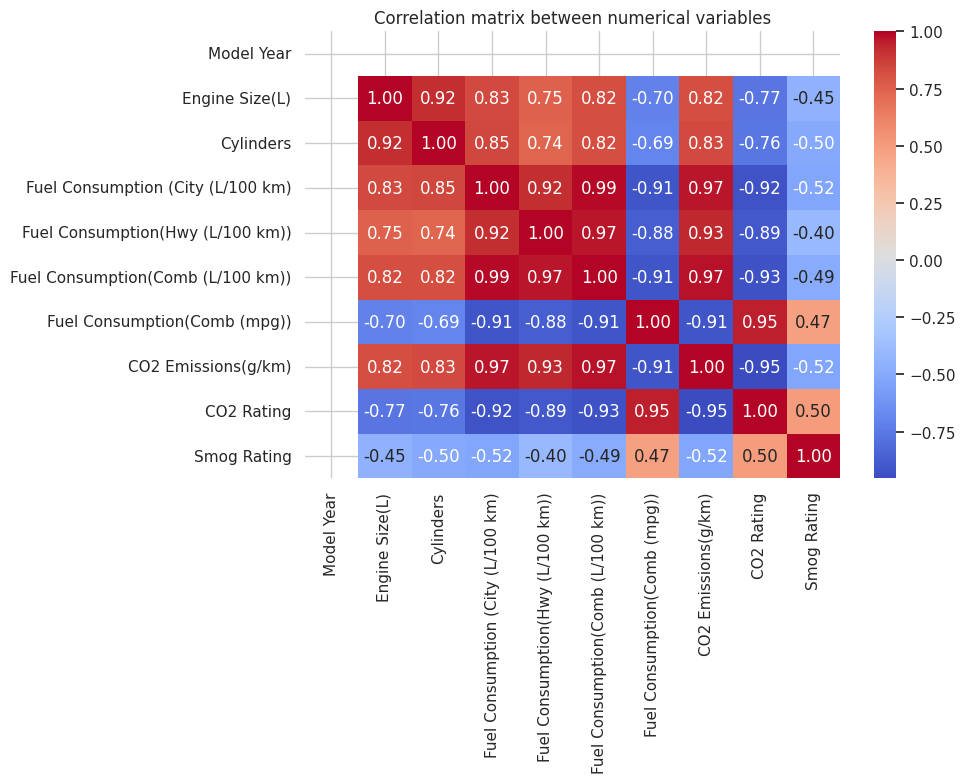

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix between numerical variables")
plt.tight_layout()
plt.show()


## Data Cleaning and Encoding

Before training models:
- We remove rows with missing values to ensure data integrity.
- Categorical features like 'Fuel Type' and 'Transmission' are transformed using one-hot encoding.
- The dataset is split into training (80%) and test (20%) sets to evaluate model generalization.


In [9]:
# Selection of relevant variables
features = [
    'Engine Size(L)',
    'Cylinders',
    'Fuel Consumption(Comb (L/100 km))',
    'Transmission',
    'Fuel Type'
]
target = 'CO2 Emissions(g/km)'

# Filter and encode
df_filtered = df[features + [target]].dropna()
df_encoded = pd.get_dummies(df_filtered, columns=['Transmission', 'Fuel Type'], drop_first=True)

# Separate X, y
from sklearn.model_selection import train_test_split

X = df_encoded.drop(target, axis=1)
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Model Training and Evaluation

We train and evaluate three different regression models:
- Linear Regression
- Random Forest Regressor
- Gradient Boosting Regressor

For each model, we compute:
- RMSE (Root Mean Squared Error): to measure prediction error,
- R² Score: to evaluate how well the model explains the variance in the target variable.


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")




Linear Regression: RMSE = 2.57, R² = 1.00
Random Forest: RMSE = 4.63, R² = 0.99
Gradient Boosting: RMSE = 2.39, R² = 1.00


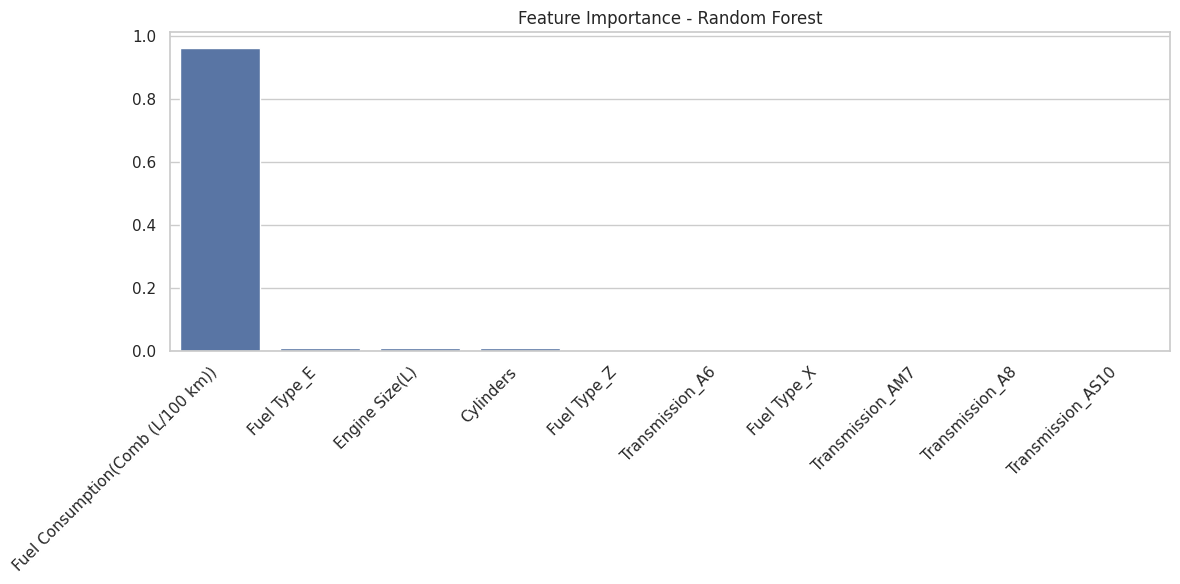

In [11]:
importances = trained_models['Random Forest'].feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=[X.columns[i] for i in indices[:10]], y=importances[indices[:10]])
plt.title("Feature Importance - Random Forest")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 📊  Complete statistics by attribute

In [12]:
# Complete statistics: mean, median, mode, and standard deviation
numerical_cols = [
    "Engine Size(L)", "Cylinders", "Fuel Consumption(Comb (L/100 km))",
    "CO2 Emissions(g/km)"
]

for col in numerical_cols:
    print(f"\n--- {col} ---")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Mode: {df[col].mode()[0]:.2f}")
    print(f"Std Dev: {df[col].std():.2f}")



--- Engine Size(L) ---
Mean: 3.20
Median: 3.00
Mode: 2.00
Std Dev: 1.37

--- Cylinders ---
Mean: 5.67
Median: 6.00
Mode: 4.00
Std Dev: 1.93

--- Fuel Consumption(Comb (L/100 km)) ---
Mean: 11.09
Median: 10.80
Mode: 9.10
Std Dev: 2.88

--- CO2 Emissions(g/km) ---
Mean: 259.17
Median: 257.00
Mode: 275.00
Std Dev: 64.44


# 📈 Extended visual analysis

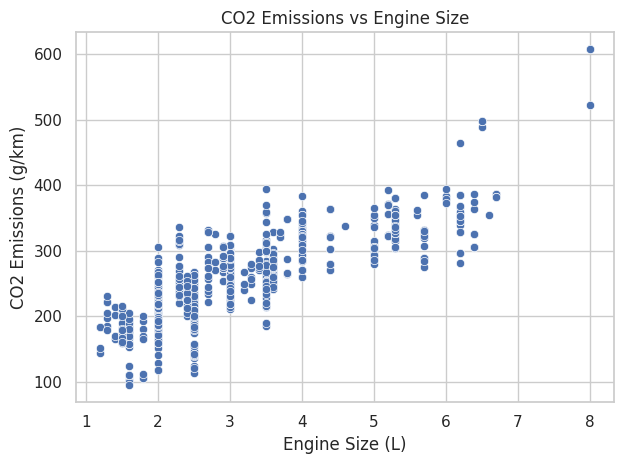

In [13]:
sns.scatterplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=df)
plt.title("CO2 Emissions vs Engine Size")
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.tight_layout()
plt.show()


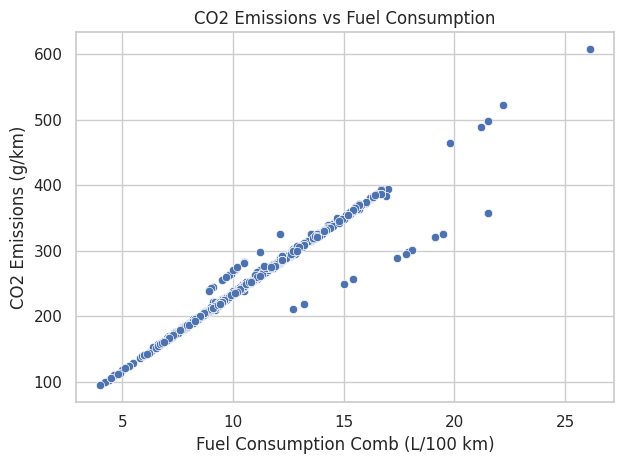

In [14]:
sns.scatterplot(x="Fuel Consumption(Comb (L/100 km))", y="CO2 Emissions(g/km)", data=df)
plt.title("CO2 Emissions vs Fuel Consumption")
plt.xlabel("Fuel Consumption Comb (L/100 km)")
plt.ylabel("CO2 Emissions (g/km)")
plt.tight_layout()
plt.show()


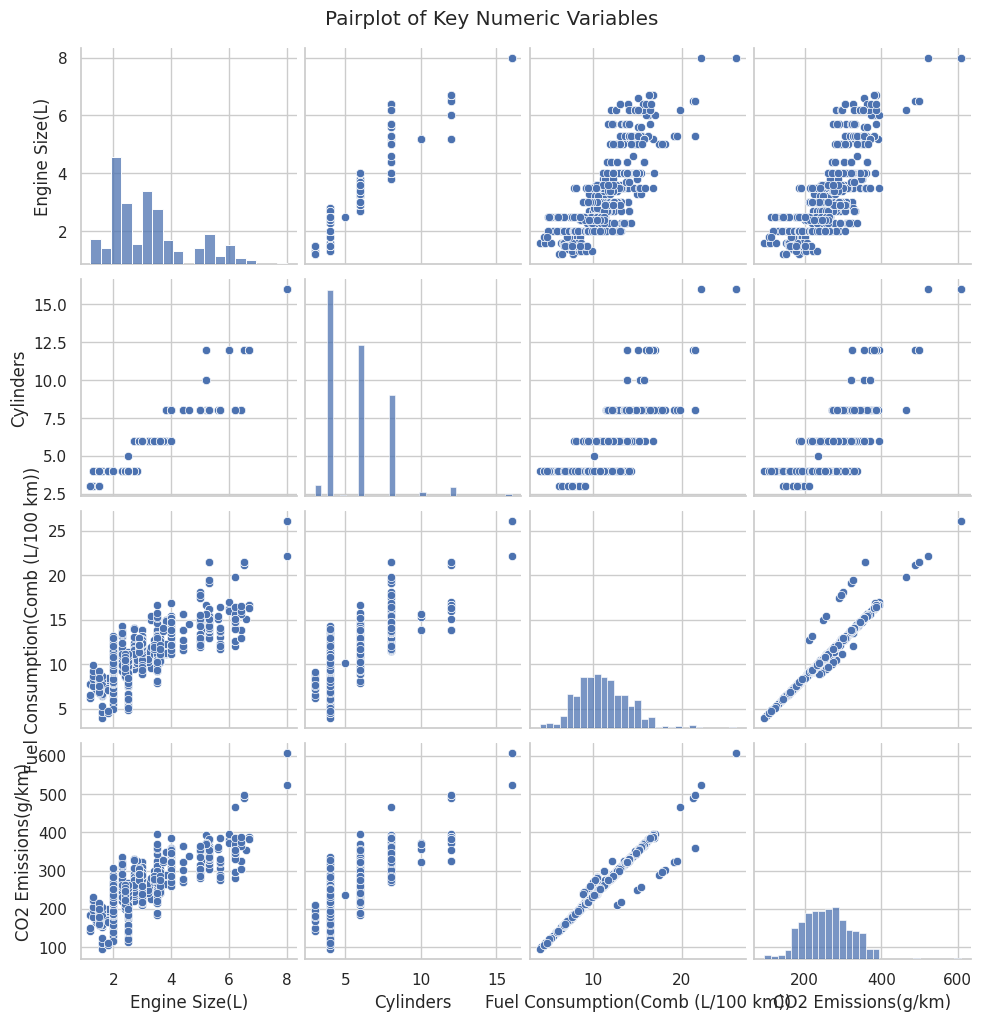

In [15]:
sns.pairplot(df[[
    "Engine Size(L)", "Cylinders", "Fuel Consumption(Comb (L/100 km))", "CO2 Emissions(g/km)"
]])
plt.suptitle("Pairplot of Key Numeric Variables", y=1.02)
plt.show()


# 🔁 Cross-validation

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

print("Cross-Validation R² Scores:", cv_scores)
print("Average CV R² Score:", cv_scores.mean())


Cross-Validation R² Scores: [0.94376179 0.89842815 0.9867826  0.99475481 0.98507674]
Average CV R² Score: 0.9617608171809987


# 🔍 Visual Comparison: Prediction vs. Actual

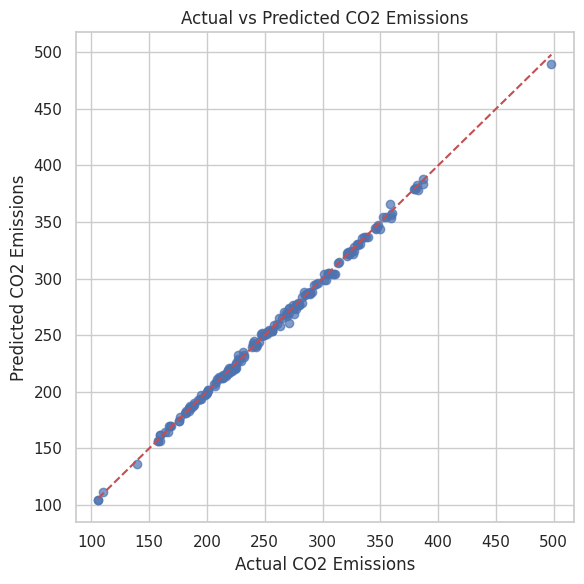

In [17]:
# Train and predict with the best model (e.g., Gradient Boosting)
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

# Actual vs. Predicted Chart
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions")
plt.tight_layout()
plt.show()


# Conclusion

The regression pipeline developed to estimate CO₂ emissions from vehicle specifications produced accurate and robust results. Gradient Boosting achieved the best performance, confirming that combined fuel consumption, engine size, and cylinder count are the most influential features. Tree-based models outperformed linear regression, and residual analysis showed minimal overfitting. The model is both effective and interpretable, making it suitable for real-world applications.